# Predvidevanje obrabljenosti orodja s pomočjo                         strojnega učenja

Dataset v notebooku last: University of Michigan SMART Lab 
https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill/version/1#README.txt

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [2]:
path = 'C:/Users/python_zan/Downloads/data01/zdruzeno123.csv'

df = pd.read_csv(path)

df = df.drop(df.columns[0], axis=1)

df['Tool_Condition'] = df.Tool_Condition.map({'unworn':1, 'worn':0})

df['Zaporedna_meritev'] = np.arange(len(df))

# 11. experiment se podvoji saj 12. ni bil popolen

## Predstavitev data seta:

In [3]:
df.head()



,#,Material,Tool_Condition,Feedrate,Clamp_Pressure,x_ActualPosition,x_ActualVelocity,x_ActualAcceleration,x_CommandPosition,x_CommandVelocity,...,s_OutputVoltage,s_OutputPower,SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Process,Finalizes,Visual Inspection,Zaporedna_meritev
0,1,wax,1,6,4.0,198.0,0.0,0.00,198.0,0.0,...,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,Yes,Yes,0
1,1,wax,1,6,4.0,198.0,-10.8,-350.00,198.0,-13.6,...,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,Yes,Yes,1
2,1,wax,1,6,4.0,196.0,-17.8,-6.25,196.0,-17.9,...,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,Yes,Yes,2
3,1,wax,1,6,4.0,194.0,-18.0,0.00,194.0,-17.9,...,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,Yes,Yes,3
4,1,wax,1,6,4.0,193.0,-17.9,-18.80,192.0,-17.9,...,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,Yes,Yes,4


## Opombe priložene k datasetu:

Vsaka vrstica v data setu je posneta v intervalu 100 ms.

x_/y_/z_ v predponi:

-   ActualPosition: actual x/y/z position of part (mm)
-	ActualVelocity: actual x/y/z velocity of part (mm/s)
-	ActualAcceleration: actual x/y/z acceleration of part (mm/s/s)
-	CommandPosition: reference  x/y/z position of part (mm)
-	CommandVelocity: reference  x/y/z velocity of part (mm/s)
-	CommandAcceleration: reference  x/y/z acceleration of part (mm/s/s)
-	CurrentFeedback: current (A)
-	DCBusVoltage: voltage (V)
-	OutputCurrent: current (A)
-	OutputVoltage: voltage (V)
-	OutputPower: power (v kW)

s_ v predponi:

-	ActualPosition: actual position of spindle (mm)
-	ActualVelocity: actual velocity of spindle (mm/s)
-	ActualAcceleration: actual acceleration of spindle (mm/s/s)
-	CommandPosition: reference position of spindle (mm)
-	CommandVelocity: reference velocity of spindle (mm/s)
-	CommandAcceleration: reference acceleration of spindle (mm/s/s)
-	CurrentFeedback: current (A)
-	DCBusVoltage: voltage (V)
-	OutputCurrent: current (A)
-	OutputVoltage: voltage (V)
-	OutputPower: current (A)
-	SystemInertia: torque inertia (kg*m^2)

M1_ v predponi:

-  M1_CURRENT_PROGRAM_NUMBER: number the program is listed under on the CNC
-  M1_sequence_number: line of G-code being executed
-  M1_CURRENT_FEEDRATE: spindle speed (mm/s)
        
Note: Some variables will not accurately reflect the operation of the
    CNC machine. This can usually be detected by when:
    -M1_CURRENT_FEEDRATE reads 50,
    -when X1 ActualPosition reads 198,
    -when M1_CURRENT_PROGRAM_NUMBER does not read 0.
    
The source of these errors has not been identified. 




In [4]:
#Odstranimo napake v datasetu

df = df[df.x_ActualPosition !=198]

df = df[df.M1_CURRENT_FEEDRATE !=50]


In [5]:
#Posododobljen data set

In [6]:
df.head()

,#,Material,Tool_Condition,Feedrate,Clamp_Pressure,x_ActualPosition,x_ActualVelocity,x_ActualAcceleration,x_CommandPosition,x_CommandVelocity,...,s_OutputVoltage,s_OutputPower,SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Process,Finalizes,Visual Inspection,Zaporedna_meritev
31,1,wax,1,6,4.0,151.0,0.075,37.50,151.0,0.0,...,44.9,0.1500,12.0,1.0,12.0,6.0,Layer 1 Up,Yes,Yes,31
32,1,wax,1,6,4.0,151.0,-0.075,-37.50,151.0,0.0,...,72.8,0.2310,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,32
33,1,wax,1,6,4.0,151.0,-6.000,6.25,150.0,-6.0,...,88.4,0.3410,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,33
34,1,wax,1,6,4.0,150.0,-6.150,-43.80,150.0,-6.0,...,109.0,0.4410,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,34
35,1,wax,1,6,4.0,149.0,-5.930,62.50,149.0,-6.0,...,112.0,0.0746,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,35


In [7]:
df.info()
# Ker 'Process', 'Finalizes', 'Visual Inspection', 
# ne bodo sodelovale v učenju jih ni treba spreminjati


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17859 entries, 31 to 25323
Data columns (total 56 columns):
#                            17859 non-null int64
Material                     17859 non-null object
Tool_Condition               17859 non-null int64
Feedrate                     17859 non-null int64
Clamp_Pressure               17859 non-null float64
x_ActualPosition             17859 non-null float64
x_ActualVelocity             17859 non-null float64
x_ActualAcceleration         17859 non-null float64
x_CommandPosition            17859 non-null float64
x_CommandVelocity            17859 non-null float64
x_CommandAcceleration        17859 non-null float64
x_CurrentFeedback            17859 non-null float64
x_DCBusVoltage               17859 non-null float64
x_OutputCurrent              17859 non-null float64
x_OutputVoltage              17859 non-null float64
x_OutputPower                17859 non-null float64
y_ActualPosition             17859 non-null float64
y_ActualVeloc

Text(0, 0.5, 'Obrabljeno orodje/Neobrabljeno orodje')

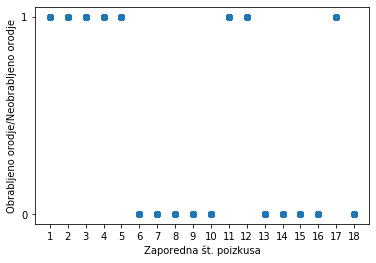

In [8]:
plt.plot( '#', 'Tool_Condition','o', data=df,)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.yticks([0,1])
plt.xlabel('Zaporedna št. poizkusa')
plt.ylabel('Obrabljeno orodje/Neobrabljeno orodje')

#Graf prikazuje stanje oroja glede na zaporedni eksperiment

([<matplotlib.axis.XTick at 0xed282e0198>,
 <a list of 3 Text xticklabel objects>)

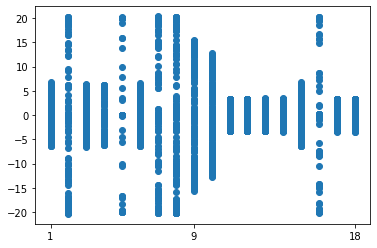

In [9]:
# Z grafom preverimo, če smo se znebili napak v podatkih

plt.plot('#', 'x_ActualVelocity', 'o', data=df)
plt.xticks([1,9,18])

## Priprava podatkov za Keras

In [10]:
df.head()

,#,Material,Tool_Condition,Feedrate,Clamp_Pressure,x_ActualPosition,x_ActualVelocity,x_ActualAcceleration,x_CommandPosition,x_CommandVelocity,...,s_OutputVoltage,s_OutputPower,SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Process,Finalizes,Visual Inspection,Zaporedna_meritev
31,1,wax,1,6,4.0,151.0,0.075,37.50,151.0,0.0,...,44.9,0.1500,12.0,1.0,12.0,6.0,Layer 1 Up,Yes,Yes,31
32,1,wax,1,6,4.0,151.0,-0.075,-37.50,151.0,0.0,...,72.8,0.2310,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,32
33,1,wax,1,6,4.0,151.0,-6.000,6.25,150.0,-6.0,...,88.4,0.3410,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,33
34,1,wax,1,6,4.0,150.0,-6.150,-43.80,150.0,-6.0,...,109.0,0.4410,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,34
35,1,wax,1,6,4.0,149.0,-5.930,62.50,149.0,-6.0,...,112.0,0.0746,12.0,1.0,14.0,6.0,Layer 1 Up,Yes,Yes,35


In [11]:

x_train= df.drop(columns=['#', 'Feedrate', 'Material','Tool_Condition',
                          'Process', 'Finalizes', 'Visual Inspection','M1_CURRENT_PROGRAM_NUMBER',
                          'M1_sequence_number','Zaporedna_meritev', 'SystemInertia'], axis=1)

x_train.head()

,Clamp_Pressure,x_ActualPosition,x_ActualVelocity,x_ActualAcceleration,x_CommandPosition,x_CommandVelocity,x_CommandAcceleration,x_CurrentFeedback,x_DCBusVoltage,x_OutputCurrent,...,s_ActualAcceleration,s_CommandPosition,s_CommandVelocity,s_CommandAcceleration,s_CurrentFeedback,s_DCBusVoltage,s_OutputCurrent,s_OutputVoltage,s_OutputPower,M1_CURRENT_FEEDRATE
31,4.0,151.0,0.075,37.50,151.0,0.0,0.0,0.878,0.0377,327.0,...,98.3,-360.0,16.6,1.000000e+02,56.70,2.560,318.0,44.9,0.1500,6.0
32,4.0,151.0,-0.075,-37.50,151.0,0.0,0.0,0.664,0.0332,325.0,...,88.5,-358.0,27.0,1.000000e+02,54.70,2.410,317.0,72.8,0.2310,6.0
33,4.0,151.0,-6.000,6.25,150.0,-6.0,0.0,-8.100,0.0983,323.0,...,98.9,-354.0,36.6,1.000000e+02,62.00,2.610,309.0,88.4,0.3410,6.0
34,4.0,150.0,-6.150,-43.80,150.0,-6.0,0.0,-6.420,0.1010,322.0,...,125.0,-350.0,46.6,1.000000e+02,59.00,2.650,306.0,109.0,0.4410,6.0
35,4.0,149.0,-5.930,62.50,149.0,-6.0,0.0,-6.670,0.0980,325.0,...,-51.0,-345.0,53.3,-9.540000e-07,9.37,0.389,324.0,112.0,0.0746,6.0


In [12]:
y_train = df[['Tool_Condition']]

#podatki za trening
y_train.head()

,Tool_Condition
31,1
32,1
33,1
34,1
35,1


# Keras

In [13]:
from keras.models import Sequential
from keras import optimizers
import sklearn
from keras.layers import Dense
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)
x_test.head()

,Clamp_Pressure,x_ActualPosition,x_ActualVelocity,x_ActualAcceleration,x_CommandPosition,x_CommandVelocity,x_CommandAcceleration,x_CurrentFeedback,x_DCBusVoltage,x_OutputCurrent,...,s_ActualAcceleration,s_CommandPosition,s_CommandVelocity,s_CommandAcceleration,s_CurrentFeedback,s_DCBusVoltage,s_OutputCurrent,s_OutputVoltage,s_OutputPower,M1_CURRENT_FEEDRATE
18007,3.0,145.0,1.80,-31.30,145.0,1.86,1.78,6.34,0.1050,327.0,...,-48.60,-1950.0,53.3,9.540000e-07,23.4,0.973,322.0,120.0,0.187,3.0
17867,3.0,159.0,2.75,-81.20,159.0,3.00,0.00,4.45,0.0644,327.0,...,49.10,1700.0,53.3,-9.540000e-07,16.5,0.725,321.0,117.0,0.138,3.0
856,4.0,142.0,3.25,31.30,142.0,3.22,11.60,4.40,0.0770,326.0,...,-2.25,-253.0,53.3,0.000000e+00,25.7,0.947,323.0,119.0,0.182,6.0
15657,4.0,148.0,-3.00,6.25,148.0,-3.00,0.00,-5.74,0.1040,327.0,...,9.50,-233.0,53.3,-9.540000e-07,19.1,0.918,322.0,118.0,0.178,3.0
805,4.0,158.0,-4.65,-18.80,158.0,-4.79,-5.49,-4.93,0.0962,326.0,...,32.10,-525.0,53.3,0.000000e+00,20.0,1.010,319.0,116.0,0.194,6.0


In [ ]:
classifier = Sequential()

# Input pa prvi layer 

classifier.add(Dense(output_dim = 90, init = 'uniform', activation = 'relu', input_dim = 45))

# 2,3,4 layer

classifier.add(Dense(output_dim =46 , init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim =32 , init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim =16 , init = 'uniform', activation = 'relu'))



# output layer

classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

#optimizacija

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#fit

classifier.fit(x_train, y_train, batch_size = 50, nb_epoch = 2000)

Epoch 1696/2000
14287/14287 [==============================] - 1s 89us/step - loss: 0.0900 - acc: 0.9600

Epoch 1889/2000
14287/14287 [==============================] - 1s 87us/step - loss: 0.0815 - acc: 0.9643

Epoch 1905/2000
14287/14287 [==============================] - 1s 91us/step - loss: 0.0772 - acc: 0.9678

mozna se vecja natančnost? but at what cost xD